In [ ]:
__author__ = "Ankur Dhoot"

## Sorting (and Recursion) Notebook

### Purpose

This notebook will demonstrate the binary search algorithm.

### Set-Up

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time


### Data Generation

In [2]:
def generate_random_sample(n):
    # Generate a random list of n numbers
    return random.sample(range(n), n)

In [3]:
generate_random_sample(10)

[9, 1, 0, 8, 5, 4, 2, 6, 7, 3]

In [4]:
generate_random_sample(20)

[14, 2, 17, 15, 18, 11, 10, 1, 3, 7, 8, 0, 19, 6, 16, 12, 13, 4, 5, 9]

### Selection Sort

https://en.wikipedia.org/wiki/Selection_sort

In [5]:
def selection_sort(list_to_sort):
    n = len(list_to_sort)
    
    # This tracks the index of the smallest element from list_to_sort[i...n]
    minIndex = 0
    
    # This algorithm maintains the invariant that list_to_sort[0...i] is sorted
    for i in range(n):
        minIndex = i
        
        # Now, find the smallest value in list_to_sort[i...n]
        for j in range(i + 1, n):
            if list_to_sort[j] < list_to_sort[minIndex]:
                minIndex = j
        
        # Swap that value into list_to_sort[i]
        temp = list_to_sort[i]
        list_to_sort[i] = list_to_sort[minIndex]
        list_to_sort[minIndex] = temp


In [6]:
test_1 = [1,2,3,4]
selection_sort(test_1)
assert test_1 == [1,2,3,4]

In [7]:
test_2 = []
selection_sort(test_2)
assert test_2 == []

In [8]:
test_3 = [4,3,2,1]
selection_sort(test_3)
assert test_3 == [1,2,3,4]

In [9]:
test_4 = [1,5,3,8]
selection_sort(test_4)
assert test_4 == [1,3,5,8]

### Merge Sort

https://en.wikipedia.org/wiki/Merge_sort

In [10]:
# Implementation taken from Sedgewick and Wayne, Algorithms

def merge_sort(list_to_sort):
    # Allocate auxiliary space just once
    aux = [0] * len(list_to_sort)
    sort(list_to_sort, aux, 0, len(list_to_sort) - 1)

def sort(list_to_sort, aux, lo, hi):
    # list_to_sort - the list to be sorted
    # aux - the auxiliary array that helps us with merge operations
    # lo, hi - sort the array between [lo...hi]
    
    # Base Case
    if hi <= lo:
        return
    mid = (lo + hi) // 2
    
    # Sort the left side
    sort(list_to_sort, aux, lo, mid)
    # Sort the right side
    sort(list_to_sort, aux, mid + 1, hi)
    # Merge the results
    merge(list_to_sort, aux, lo, mid, hi)
    
            
    

In [11]:
def merge(a, aux, lo, mid, hi):
    # Merge a[lo..mid] with a[mid + 1..hi]
    # Requires that a[lo..mid] and a[mid_1..hi] be sorted
    
    # The index into the next element to be drawn from a[lo...mid]
    i = lo
    # The index into the next element to be drawn from a[mid+1...hi]
    j = mid + 1
    
    # Copy a[lo...hi] to aux[lo..hi]
    for k in range(lo, hi+1):
        aux[k] = a[k]
    
    # Merge back into a[lo..hi]
    for k in range(lo, hi+1):
        if i > mid:
            # We've exhausted the left hand side. Take from the right.
            a[k] = aux[j]
            j = j + 1
        elif j > hi:
            # We've exhausted the right hand side. Take from the left.
            a[k] = aux[i]
            i = i + 1
        elif aux[i] < aux[j]:
            # Draw from left side.
            a[k] = aux[i]
            i = i + 1
        else:
            # Draw from right side
            a[k] = aux[j]
            j = j + 1

In [12]:
test_1 = [1,2,3,4]
merge_sort(test_1)
assert test_1 == [1,2,3,4]

In [16]:
test_2 = []
merge_sort(test_2)
assert test_2 == []

In [17]:
test_3 = [4,3,2,1]
merge_sort(test_3)
assert test_3 == [1,2,3,4]

In [18]:
test_4 = [1,5,3,8]
merge_sort(test_4)
assert test_4 == [1,3,5,8]

### Runtime Comparison

Let's generate some test data and see how these algorithms compare.

In [20]:
# Average over num_runs.
num_runs = 1000
# list size
size = 1000

#### Selection Sort

In [21]:
selection_sort_start_time = time.time()
for run in range(num_runs):
    # Generate the list of random numbers
    list_to_sort = generate_random_sample(size)
    selection_sort(list_to_sort)
    
selection_sort_end_time = time.time()

avg_time = (selection_sort_end_time - selection_sort_start_time) / num_runs
print('Selection Sort Average Time %fs' % avg_time)

Selection Sort Average Time 0.044998s


#### Merge Sort

In [25]:
merge_sort_start_time = time.time()
for run in range(num_runs):
    # Generate the list of random numbers
    list_to_sort = generate_random_sample(size)
    merge_sort(list_to_sort)
    
merge_sort_end_time = time.time()

avg_time = (merge_sort_end_time - merge_sort_start_time) / num_runs
print('Merge Sort Average Time %fs' % avg_time)

Merge Sort Average Time 0.004805s


#### Linear Scan Runtime Plot

Let's look at how the selection sort scales with the list size.

In [26]:
def eval_algorithm(algorithm, num_runs=100, list_sizes=[1, 100, 500, 1000, 2000, 3000, 4000]):
    # Run the sorting algorithm multiple times over different list sizes.
    sort_times = []

    for size in list_sizes:
        total_time = 0
        for run in range(num_runs):
            # Create a random list.
            list_to_sort = generate_random_sample(size)
            start_time = time.time()
            algorithm(list_to_sort)
            end_time = time.time()
            total_time += end_time - start_time

        # Record how long sorting took on average
        sort_times.append(total_time / num_runs)

    plt.plot(list_sizes, sort_times)
    plt.ylabel('RunTime')
    plt.xlabel('List Size')

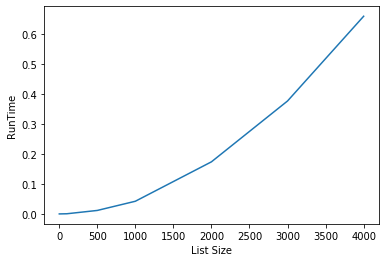

In [27]:
eval_algorithm(selection_sort)

#### Merge Sort Runtime Plot

Let's look at how the merge sort scales with the list size.

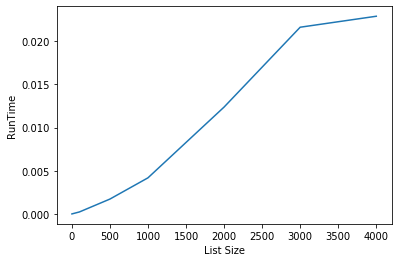

In [28]:
eval_algorithm(merge_sort, num_runs=100, list_sizes=[1, 100, 500, 1000, 2000, 3000, 4000])

#### Conclusion

Looking at the runtime plots, we can see that the runtime of merge sort grows *almost* linearly with the size of the input. The runtime of selection sort is quadratic.

#### Applications

https://leetcode.com/problems/valid-anagram